In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/

/content/drive/MyDrive


In [3]:
!pip install efficientnet_pytorch

  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16446 sha256=4fc014f712373c8fe4004ec105ce1c34c31b5854706fcc7337a5c77e0c14685b
  Stored in directory: /root/.cache/pip/wheels/0e/cc/b2/49e74588263573ff778da58cc99b9c6349b496636a7e165be6
Successfully built efficientnet-pytorch


In [4]:
!pip install timm

     |████████████████████████████████| 376 kB 3.8 MB/s 


In [ ]:
import torch.nn as nn  
from efficientnet_pytorch import EfficientNet
from torchvision import models
######################## efficientnet b3 #####################
model_t = EfficientNet.from_pretrained("efficientnet-b3")
model_t._fc=nn.Linear(model_t._fc.in_features, 3)        
model2=model_t
########################## DensNet201 ###########################
model_ft = models.densenet201(pretrained=True)
num_ftrs = model_ft.classifier.in_features
model_ft.classifier= nn.Linear(num_ftrs, 3)
model1=model_ft

model_ftn = models.densenet201(pretrained=True)
num_ftrs = model_ftn.classifier.in_features
model_ftn.classifier= nn.Linear(num_ftrs, 3)
modeln=model_ftn

model_ftn = models.densenet201(pretrained=True)
num_ftrs = model_ftn.classifier.in_features
model_ftn.classifier= nn.Linear(num_ftrs, 3)
modelnn=model_ftn
############################### DensNet161################
model_ft = models.densenet161(pretrained=True)
num_ftrs = model_ft.classifier.in_features
model_ft.classifier= nn.Linear(num_ftrs, 3)
model4=model_ft
############################### efficientnetb0 #################
import torch.nn as nn  
from efficientnet_pytorch import EfficientNet
from torchvision import models
model_t0 = EfficientNet.from_pretrained("efficientnet-b0")
model_t0._fc=nn.Linear(model_t0._fc.in_features, 3)        
model3=model_t0
import timm
class ViTBase16(nn.Module):
    def __init__(self, model_name, n_classes, pretrained=False):

        super(ViTBase16, self).__init__()

        self.model = timm.create_model(model_name, pretrained=pretrained)
        self.model.head = nn.Linear(self.model.head.in_features, n_classes)
        # self.model.head = nn.Sequential(nn.Linear(self.model.head.in_features, 512),
        #                                 nn.Dropout(0.5),
        #                                 nn.ReLU(True),
        #                                 nn.Linear(512,n_classes),
        #                                 )
        #self.model.classifier = nn.Linear(self.model.classifier.in_features, n_classes)

    def forward(self, x):
        x = self.model(x)
        return x
model = ViTBase16('vit_base_patch16_224',n_classes=3, pretrained=True)
model_t=model

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b3-5fb5a3c3.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b3-5fb5a3c3.pth


  0%|          | 0.00/47.1M [00:00<?, ?B/s]

Loaded pretrained weights for efficientnet-b3


Downloading: "https://download.pytorch.org/models/densenet201-c1103571.pth" to /root/.cache/torch/hub/checkpoints/densenet201-c1103571.pth


  0%|          | 0.00/77.4M [00:00<?, ?B/s]

Downloading: "https://download.pytorch.org/models/densenet161-8d451a50.pth" to /root/.cache/torch/hub/checkpoints/densenet161-8d451a50.pth


  0%|          | 0.00/110M [00:00<?, ?B/s]

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b0-355c32eb.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b0-355c32eb.pth


  0%|          | 0.00/20.4M [00:00<?, ?B/s]

Loaded pretrained weights for efficientnet-b0


In [ ]:
######## load the model weights
import torch
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
#PATH='/content/drive/MyDrive/Models/modelDensNet.pth'
PATH='/content/drive/MyDrive/Models/model_DesNetnn.pth'
model = modeln
#checkpoint = torch.load(PATH)
model.load_state_dict(torch.load(PATH))
model.eval()
model.to(device)

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [ ]:
!pip install ttach

In [ ]:
############# Ensmebling of different models ###########
def get_model_DesnNet201(PATH):
    model = model1
    #checkpoint = torch.load(PATH)
    model.load_state_dict(torch.load(PATH))
    model.eval()
    return model.to(device)

def get_model_DesnNet201n(PATH):
    model = modeln
    #checkpoint = torch.load(PATH)
    model.load_state_dict(torch.load(PATH))
    model.eval()
    return model.to(device)

def get_model_DesnNet201nn(PATH):
    model = modelnn
    #checkpoint = torch.load(PATH)
    model.load_state_dict(torch.load(PATH))
    model.eval()
    return model.to(device)

def get_model_DesnNet161(PATH):
    model = model4
    #checkpoint = torch.load(PATH)
    model.load_state_dict(torch.load(PATH))
    model.eval()
    return model.to(device)

def get_model_Effib3(PATH):
    model=model2
    #checkpoint = torch.load(PATH)
    model.load_state_dict(torch.load(PATH))
    model.eval()
    return model.to(device)
def get_model_Effib0(PATH):
    model = model3
    #checkpoint = torch.load(PATH)
    model.load_state_dict(torch.load(PATH))
    model.eval()
    return model.to(device)

def get_model_transformer(PATH):
    model = model_t
    #checkpoint = torch.load(PATH)
    model.load_state_dict(torch.load(PATH))
    model.eval()
    return model.to(device)

In [ ]:
# Ensembling different trained models
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
class EnsembledModel():

    def __init__(self, model_paths):
        super().__init__()
        self.num_models = len(model_paths)

        self.leafmodel1 = get_model_DesnNet201(model_paths[0])
        self.leafmodel2 = get_model_Effib3(model_paths[1])
        self.leafmodel3 = get_model_DesnNet201nn(model_paths[2])
        self.leafmodel4 = get_model_DesnNet201n(model_paths[3])
        #self.leafmodel5 = get_model_transformer(model_paths[4])
        

    def predict(self, x):
        with torch.no_grad():
            l1 = self.leafmodel1(x)
            l2 = self.leafmodel2(x)
            l3=self.leafmodel3(x)
            l4=self.leafmodel4(x)
            #l5=self.leafmodel5(x)
            #b4_e1 = self.effb4_model1(x)
            pred = (l1+l2+l3+l4) / (self.num_models)
            #pred = (l1+l2+l4) 
            #pred = l4

            return pred

In [ ]:
import torch
model_paths = [
    '/content/drive/MyDrive/Models/model_DesNetlast.pth',
    '/content/drive/MyDrive/Models/model_efficientsb3.pth',
    '/content/drive/MyDrive/Models/model_DesNetn.pth',
    '/content/drive/MyDrive/Models/modelDensnet220.pth',
    #'/content/drive/MyDrive/Models/model_transformers.pth',
]

model_e = EnsembledModel(model_paths)

In [ ]:
import os
import pandas as pd
from PIL import Image
import numpy as np
import cv2
from collections import defaultdict
import copy
import random
import shutil
import albumentations as A
#from albumentations.pytorch import ToTensorV2
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
import torch
import torch.backends.cudnn as cudnn
import torch.nn as nn
import torch.optim
from torch.utils.data import Dataset, DataLoader
import torchvision.models as models
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
cudnn.benchmark = True
from torchvision import transforms
import ttach as tta
import natsort

#transforms11 = tta.Compose(
    #[
        #tta.HorizontalFlip(),
        #tta.Rotate90(angles=[0, 180]),
        #tta.Scale(scales=[1, 2, 4]),
        #tta.Multiply(factors=[0.9, 1, 1.1]),        
    #]
#)
import os
import numpy as np
path_val="/content/drive/MyDrive/validationdata/validation"
lstdir_c=os.listdir(os.path.join(path_val,"covid"))
lstdir_n=os.listdir(os.path.join(path_val,"normal"))
lstdir_p=os.listdir(os.path.join(path_val,"pneumonia"))
#print(lstdir)
import natsort
covd_lst=[]
for i in natsort.natsorted(lstdir_c):
  covd_lst.append((os.path.join(os.path.join(path_val,"covid"),i),0))

normal_lst=[]
for i in natsort.natsorted(lstdir_n):
  normal_lst.append((os.path.join(os.path.join(path_val,"normal"),i),1))

pneumonia_lst=[]
for i in natsort.natsorted(lstdir_p):
  pneumonia_lst.append((os.path.join(os.path.join(path_val,"pneumonia"),i),2))

val_data=covd_lst+normal_lst+pneumonia_lst
valid_transform=transforms.Compose([#transforms.Resize(224),
                                   transforms.ToTensor(),
                                   transforms.Normalize([0.485,0.456,0.406],[0.299,0.224,0.225])
                                   ])
#tta_model = tta.SegmentationTTAWrapper(model, transforms)
####################### path of test dataset ######################
#path_test="/content/drive/MyDrive/testset"
#lstdir=os.listdir(path_test)

prediction_matrix=[]
ground_truth=[]
for i in val_data:
  #print(i)
  pathtest,label=i
  #print(pathtest)
  img=cv2.imread(pathtest)
  img_bgr_rgb= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  resized = cv2.resize(img_bgr_rgb,(224,244), interpolation = cv2.INTER_CUBIC)
  #image=Image.open(pathval)
  image = Image.fromarray(resized)
  #image=Image.open(pathval)
  #image_g=np.array(Image.open(pathval))
  img_t=valid_transform(image)
  #print(img_t.shape)
  img_t1=torch.unsqueeze(img_t,dim=0)
  #print(img_t1.shape)
  img_t1=img_t1.float().to(device)

  #model=model.to(device)
  #tta_model = tta.ClassificationTTAWrapper(model_e.predict, tta.aliases.five_crop_transform(224,224))
  #tta_model = tta.ClassificationTTAWrapper(model_e.predict, tta.aliases.ten_crop_transform(224,224))
  #tta_model= tta.ClassificationTTAWrapper(model_e.predict, transforms)
  ############### tis test time augmentation provided best score so far########
  tta_model = tta.ClassificationTTAWrapper(model_e.predict, tta.aliases.flip_transform())
  # tta.aliases.flip_transform() define horizontal and vertical flip boths #####
  outputs = tta_model(img_t1)
  # get the class probability predictions and save them for validation
  y_ = torch.softmax(outputs, dim=1)
  p=np.array(y_.detach().cpu())
  prediction_matrix.append(np.squeeze(p))
  print(np.squeeze(p))
  ground_truth.append(label)
  #labels.append(np.squeeze(p))
  #outputs=torch.nn.Softmax(outputs,1)
  #_, predicted = torch.max(outputs.data, 1) # take maximum index from logitis or predcition
    
  #feat=np.array(outputs.data.detach().cpu())
  #feat1=np.squeeze(feat)
  #print(feat1)
  #featclass3.append(feat1)
  #print(predicted.detach().cpu().numpy())
  #p=np.array(predicted.detach().cpu())
  #print(np.squeeze(p))
  #labels.append(np.squeeze(p))
  #predicted1.append(predicted.detach().cpu().numpy())
  #data["case"].append(i)
 # data["class"].append(np.squeeze(p)) ## save prediction

[1.0000000e+00 7.2206852e-11 1.6680457e-10]
[1.0000000e+00 2.3789173e-08 6.1721015e-12]
[1.0000000e+00 2.7462397e-12 2.7248267e-12]
[1.0000000e+00 1.2488087e-09 2.4375507e-10]
[9.9999952e-01 7.6231119e-15 4.3365452e-07]
[1.0000000e+00 5.5046838e-14 1.0220425e-11]
[9.9999988e-01 1.2029655e-07 4.4645085e-10]
[9.9999988e-01 1.6853055e-13 1.5565809e-07]
[1.0000000e+00 2.4240923e-13 1.6165919e-11]
[1.00000000e+00 1.02975096e-13 8.45522603e-15]
[1.0000000e+00 6.0854872e-14 5.5459425e-14]
[1.0000000e+00 2.9639321e-16 1.3776937e-09]
[1.0000000e+00 7.0744708e-09 7.2963378e-09]
[1.0000000e+00 2.3132428e-10 4.5981782e-10]
[9.9999928e-01 2.6603716e-14 7.2415071e-07]
[9.9999952e-01 4.3515877e-07 9.9053432e-09]
[1.0000000e+00 2.7312672e-09 3.2842181e-08]
[9.9999976e-01 9.7067634e-08 1.3051591e-07]
[1.0000000e+00 2.0428065e-12 3.9828279e-08]
[1.0000000e+00 3.8959469e-13 2.0828886e-14]
[1.0000000e+00 8.5163371e-16 1.5123993e-13]
[9.9999905e-01 1.1597579e-08 1.0103133e-06]
[9.9999988e-01 1.6898851e-14 

In [ ]:
pp=np.array(prediction_matrix)
ppp=np.squeeze(np.squeeze(prediction_matrix))
print(prediction_matrix[0])

[1.0000000e+00 7.2206852e-11 1.6680457e-10]


In [ ]:
GT_Val=np.array(ground_truth)
print(np.array(ground_truth))

[0 0 0 ... 2 2 2]


In [ ]:
len(ground_truth)

3432

In [ ]:
#!mkdir prediction_covid

In [ ]:
np.save('/content/drive/MyDrive/prediction_covid/Ensemble_prediciton.npy',prediction_matrix)
np.save('/content/drive/MyDrive/prediction_covid/Ensemble_labelGT.npy',GT_Val)

In [27]:
import numpy as np
import os
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import pandas as pd
from numpy import argmax
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score, auc, roc_curve, precision_recall_curve

#     return dataparam
dataparam={"Accuracy":[],
           "Percision":[],
           "Recall":[],
           "F1_score":[],
           "Covid_Accu":[],
           "Normal_Accu":[],
           "Pneumonia_Accu":[],
           }
def performance(pathG,pathP):
    GT=np.load(pathG)
    Pred=np.load(pathP)
    Pred_arg=np.argmax(Pred,axis=1)
    y_true=GT
    y_pred=Pred_arg
    precision,recall,fscore,support=score(y_true,y_pred,average='macro')
    acc=accuracy_score(y_true, y_pred)
    conf_mat=confusion_matrix(y_true, y_pred)
    class_accuracy=conf_mat.diagonal()/conf_mat.sum(1)
    class1=class_accuracy[0]
    class2=class_accuracy[1]
    dataparam["Accuracy"].append(acc)
    dataparam["Percision"].append(precision)
    dataparam["Recall"].append(recall)
    dataparam["F1_score"].append(fscore)
    dataparam["Covid_Accu"].append(class_accuracy[0])
    dataparam["Normal_Accu"].append(class_accuracy[1])
    dataparam["Pneumonia_Accu"].append(class_accuracy[2])
    return dataparam

In [31]:
#D=os.path.join(pathresults,"GT_DensNet.npy","P_DensNet.npy"))
pathG1='/content/drive/MyDrive/prediction_covid/Ensemble_labelGT.npy'
pathP1='/content/drive/MyDrive/prediction_covid/Ensemble_prediciton.npy'

pathG2='/content/drive/MyDrive/prediction_covid/DensNetlast1_labelGT.npy'
pathP2='/content/drive/MyDrive/prediction_covid/DensNetlast1_prediciton.npy'

pathG3='/content/drive/MyDrive/prediction_covid/DensNet201_labelGT.npy'
pathP3='/content/drive/MyDrive/prediction_covid/DensNet201_prediciton.npy'

pathG4='/content/drive/MyDrive/prediction_covid/DensNetlast2_labelGT.npy'
pathP4='/content/drive/MyDrive/prediction_covid/DensNetlast2_prediciton.npy'

pathG5='/content/drive/MyDrive/prediction_covid/efficientNetb3_labelGT.npy'
pathP5='/content/drive/MyDrive/prediction_covid/efficientNetb3_prediciton.npy'


dataparam1=performance(pathG1,pathP1)
dataparam2=performance(pathG2,pathP2)
dataparam3=performance(pathG3,pathP3)
dataparam4=performance(pathG4,pathP4)
dataparam5=performance(pathG5,pathP5)
#dataparam=[dataparam1,dataparam2,dataparam3,dataparam4,dataparam5]
df1=pd.DataFrame.from_dict(dataparam1)
df2=pd.DataFrame.from_dict(dataparam2)
df3=pd.DataFrame.from_dict(dataparam3)
df4=pd.DataFrame.from_dict(dataparam4)
df5=pd.DataFrame.from_dict(dataparam5)

result=df1.rename(index={0: "Late_Ensemble"})
result=df2.rename(index={1: "DensNet201_Adam"})
result=df3.rename(index={2: "DensNet201_AdamW"})
result=df4.rename(index={3: "DensNet201_Adamax"})
result=df5.rename(index={4: "EfficientNet-B3"})

In [29]:
df4

,Accuracy,Percision,Recall,F1_score,Covid_Accu,Normal_Accu,Pneumonia_Accu
0,0.968240,0.963827,0.964069,0.963942,0.997207,0.951,0.944
1,0.959790,0.955066,0.955408,0.955159,0.990223,0.949,0.927
2,0.949009,0.947144,0.942270,0.944480,0.995810,0.912,0.919
3,0.959790,0.954959,0.955408,0.955082,0.990223,0.950,0.926
4,0.958042,0.952952,0.954816,0.953836,0.980447,0.943,0.941


In [32]:
result

,Accuracy,Percision,Recall,F1_score,Covid_Accu,Normal_Accu,Pneumonia_Accu
0,0.968240,0.963827,0.964069,0.963942,0.997207,0.951,0.944
1,0.959790,0.955066,0.955408,0.955159,0.990223,0.949,0.927
2,0.949009,0.947144,0.942270,0.944480,0.995810,0.912,0.919
3,0.959790,0.954959,0.955408,0.955082,0.990223,0.950,0.926
EfficientNet-B3,0.958042,0.952952,0.954816,0.953836,0.980447,0.943,0.941
5,0.968240,0.963827,0.964069,0.963942,0.997207,0.951,0.944
6,0.959790,0.955066,0.955408,0.955159,0.990223,0.949,0.927
7,0.949009,0.947144,0.942270,0.944480,0.995810,0.912,0.919
8,0.959790,0.954959,0.955408,0.955082,0.990223,0.950,0.926
9,0.958042,0.952952,0.954816,0.953836,0.980447,0.943,0.941


In [ ]:
result.to_csv("/content/drive/MyDrive/prediction_covid/Results_ensmble.csv")

<Figure size 432x288 with 0 Axes>

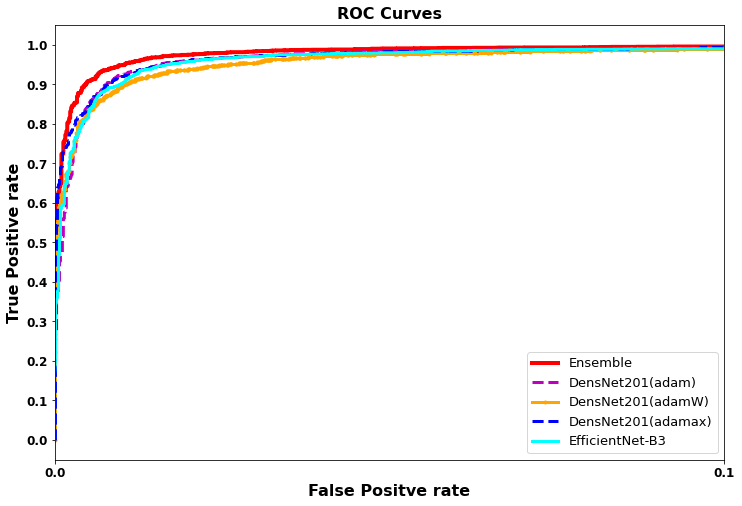

In [33]:
def performanceROC(pathG,pathP):
    GT=np.load(pathG)
    Pred=np.load(pathP)
    encoded_Gt = to_categorical(GT)
    #Pred_arg=np.argmax(Pred,axis=1)
    y_true=encoded_Gt.ravel()
    
    y_pred=Pred.ravel()
    return y_true,y_pred


pathG1='/content/drive/MyDrive/prediction_covid/Ensemble_labelGT.npy'
pathP1='/content/drive/MyDrive/prediction_covid/Ensemble_prediciton.npy'

pathG2='/content/drive/MyDrive/prediction_covid/DensNetlast1_labelGT.npy'
pathP2='/content/drive/MyDrive/prediction_covid/DensNetlast1_prediciton.npy'

pathG3='/content/drive/MyDrive/prediction_covid/DensNet201_labelGT.npy'
pathP3='/content/drive/MyDrive/prediction_covid/DensNet201_prediciton.npy'

pathG4='/content/drive/MyDrive/prediction_covid/DensNetlast2_labelGT.npy'
pathP4='/content/drive/MyDrive/prediction_covid/DensNetlast2_prediciton.npy'

pathG5='/content/drive/MyDrive/prediction_covid/efficientNetb3_labelGT.npy'
pathP5='/content/drive/MyDrive/prediction_covid/efficientNetb3_prediciton.npy'

y_true1,y_pred1=performanceROC(pathG1,pathP1)
y_true2,y_pred2=performanceROC(pathG2,pathP2)
y_true3,y_pred3=performanceROC(pathG3,pathP3) 
y_true4,y_pred4=performanceROC(pathG4,pathP4) 
y_true5,y_pred5=performanceROC(pathG5,pathP5) 
#y_true6,y_pred6=performanceROC(pathresultsm,"GT_MobileNet.npy","y_pred_MobileNet.npy")

def rocp(y_true, y_pred):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    au = auc(fpr, tpr)
    return fpr, tpr, thresholds,au

fpr1, tpr1, thresholds1,auc1=rocp(y_true1, y_pred1)
fpr2, tpr2, thresholds2,auc2=rocp(y_true2, y_pred2)
fpr3, tpr3, thresholds3,auc3=rocp(y_true3, y_pred3)
fpr4, tpr4, thresholds4,auc4=rocp(y_true4, y_pred4)
fpr5, tpr5, thresholds5,auc5=rocp(y_true5, y_pred5)
#fpr6, tpr6, thresholds6,auc6=rocp(y_true6, y_pred6)

plt.figure(1)
fig,ax = plt.subplots(figsize=(12,8))
ax.plot(fpr1, tpr1,color='red', linestyle='-', linewidth=4.0,label= 'Ensemble')

ax.plot(fpr2, tpr2,color='m',linestyle='--', linewidth=3.0,label= 'DensNet201(adam)')
ax.plot(fpr3, tpr3,marker='o',color='orange', markersize=3,linestyle= '-', linewidth=3.0,label= 'DensNet201(adamW)')
ax.plot(fpr4, tpr4,color='blue', linestyle='--',linewidth=3.0, label= 'DensNet201(adamax)')
ax.plot(fpr5, tpr5,color='cyan', linestyle='-', linewidth=3.0,label= 'EfficientNet-B3')

#ax.plot(fpr6, tpr6,color='green', linestyle='--',linewidth=3.0, label= 'Finetune_MobileNet')
################# 
plt.xticks(np.arange(0.0, 1.1, step=0.1),fontsize=12,fontweight='bold')
plt.xlabel('False Positve rate',fontsize=16,fontweight='bold')
plt.yticks(np.arange(0.0, 1.1, step=0.1),fontsize=12,fontweight='bold')
plt.ylabel('True Positive rate',fontsize=16,fontweight='bold')
#plt.title('ROC curve')
plt.title('ROC Curves', fontweight='bold', fontsize=16)
plt.xlim([0,0.1])
#plt.ylim([0,1.25])
plt.legend(prop={'size':13}, loc='lower right',fontsize=16)
#ax.legend(loc="bottom right",fontweight='bold')
plt.savefig('ResNet18.png',dpi=100)
plt.savefig("test.svg")

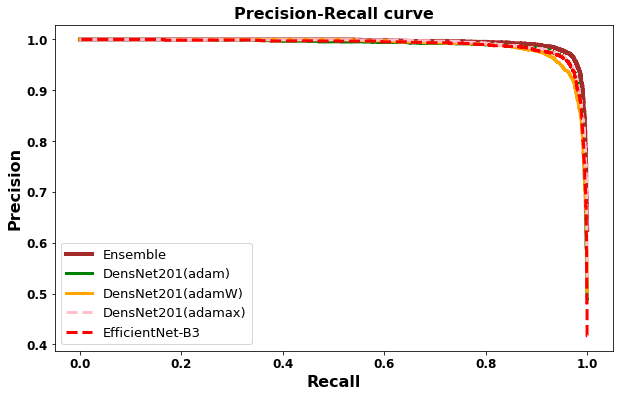

In [34]:
def preRecallCurve(y_true,y_pred):
    average_precision = average_precision_score(y_true,y_pred)
    p, r, _ = precision_recall_curve(y_true,y_pred)
    return average_precision,p,r
def performanceROC(pathG,pathP):
    GT=np.load(pathG)
    Pred=np.load(pathP)
    encoded_Gt = to_categorical(GT)
    #Pred_arg=np.argmax(Pred,axis=1)
    y_true=encoded_Gt.ravel()
    
    y_pred=Pred.ravel()
    return y_true,y_pred


pathG1='/content/drive/MyDrive/prediction_covid/Ensemble_labelGT.npy'
pathP1='/content/drive/MyDrive/prediction_covid/Ensemble_prediciton.npy'

pathG2='/content/drive/MyDrive/prediction_covid/DensNetlast1_labelGT.npy'
pathP2='/content/drive/MyDrive/prediction_covid/DensNetlast1_prediciton.npy'

pathG3='/content/drive/MyDrive/prediction_covid/DensNet201_labelGT.npy'
pathP3='/content/drive/MyDrive/prediction_covid/DensNet201_prediciton.npy'

pathG4='/content/drive/MyDrive/prediction_covid/DensNetlast2_labelGT.npy'
pathP4='/content/drive/MyDrive/prediction_covid/DensNetlast2_prediciton.npy'

pathG5='/content/drive/MyDrive/prediction_covid/efficientNetb3_labelGT.npy'
pathP5='/content/drive/MyDrive/prediction_covid/efficientNetb3_prediciton.npy'

y_true1,y_pred1=performanceROC(pathG1,pathP1)
y_true2,y_pred2=performanceROC(pathG2,pathP2)
y_true3,y_pred3=performanceROC(pathG3,pathP3) 
y_true4,y_pred4=performanceROC(pathG4,pathP4) 
y_true5,y_pred5=performanceROC(pathG5,pathP5) 
average_precision1,p1,r1=preRecallCurve(y_true1,y_pred1)
average_precision2,p2,r2=preRecallCurve(y_true2,y_pred2)
average_precision3,p3,r3=preRecallCurve(y_true3,y_pred3)
average_precision4,p4,r4=preRecallCurve(y_true4,y_pred4)
average_precision5,p5,r5=preRecallCurve(y_true5,y_pred5)
#average_precision6,p6,r6=preRecallCurve(y_true6,y_pred6)
    
plt.figure(figsize=(10,6))
plt.step(r1, p1,color='brown', linewidth=4, where='post', label='Ensemble')
plt.step(r2, p2,color='green', linewidth=3, where='post', label='DensNet201(adam)')
plt.step(r3, p3, linewidth=3,color='orange', where='post', label='DensNet201(adamW)')
plt.step(r4, p4,color='pink', linestyle='--',linewidth=3, where='post', label='DensNet201(adamax)')
plt.step(r5, p5,color='red',linestyle='--', linewidth=3, where='post', label='EfficientNet-B3')
#plt.step(r6, r6,color='blue',linestyle='--', linewidth=3, where='post', label='Finetune_MobileNet')

# plt.ylim([0.0, 1.09])
# plt.xlim([0.0, 1.0])
plt.xlabel('Recall',fontsize=16,fontweight='bold')
plt.ylabel('Precision',fontsize=16,fontweight='bold')
# plt.title('Precision-Recall curve')
# plt.legend(loc="lower left")

plt.xticks(fontsize=12,fontweight='bold')
#plt.xlabel('False Positve rate',fontsize=16,fontweight='bold')
plt.yticks(fontsize=12,fontweight='bold')
#plt.ylabel('True Positive rate',fontsize=16,fontweight='bold')
#plt.title('ROC curve')
plt.title('Precision-Recall curve', fontweight='bold', fontsize=16)
plt.legend(prop={'size':13}, loc='lower left',fontsize=16)
# plt.xlim([0,0.3])
# plt.ylim([0,1])

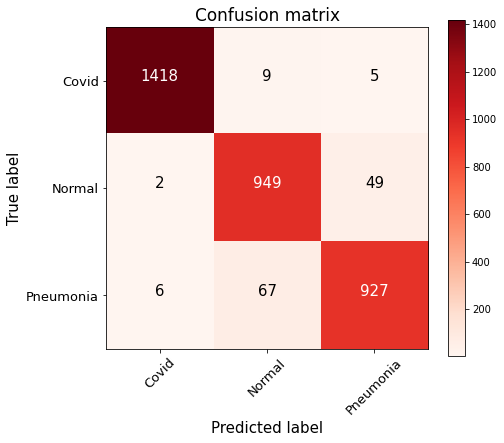

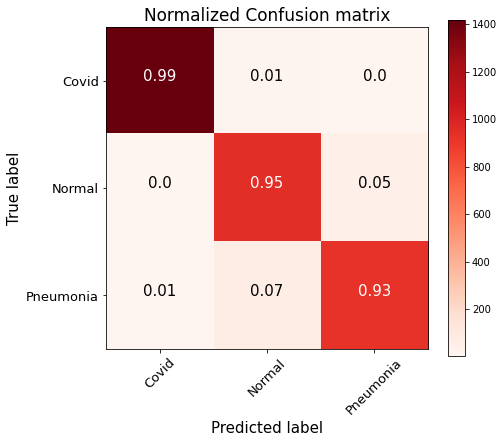

In [36]:
def performanceCM(pathG,pathP):
    GT=np.load(pathG)
    Pred=np.load(pathP)
    #encoded_Gt = to_categorical(GT)
    Pred_arg=np.argmax(Pred,axis=1)
    y_true=GT
    
    y_pred=Pred_arg
    return y_true,y_pred


pathG1='/content/drive/MyDrive/prediction_covid/Ensemble_labelGT.npy'
pathP1='/content/drive/MyDrive/prediction_covid/Ensemble_prediciton.npy'

pathG2='/content/drive/MyDrive/prediction_covid/DensNetlast1_labelGT.npy'
pathP2='/content/drive/MyDrive/prediction_covid/DensNetlast1_prediciton.npy'
y_true1,y_pred1=performanceCM(pathG2,pathP2)



# plot conum
y_test=y_true1
y_pred=y_pred1
classes= ['Covid','Normal','Pneumonia']

#Get the confusion matrix
import matplotlib.pyplot as plt
#cm = confusion_matrix(y_test3, y_pred2)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
import itertools
# fontweight='bold'
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,fontsize=17)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45,fontsize=13)
    plt.yticks(tick_marks, classes,fontsize=13)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = cm.round(2)
        #print("Normalized confusion matrix")
    else:
        cm=cm
        #print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",fontsize=15)

    plt.tight_layout()
    plt.ylabel('True label',fontsize=15)
    plt.xlabel('Predicted label',fontsize=15)


np.set_printoptions(precision=2)

fig1 = plt.figure(figsize=(7,6))
plot_confusion_matrix(conf_mat, classes=classes, title='Confusion matrix')
#fig1.savefig('../cm_wo_norm.jpg')
plt.show()

np.set_printoptions(precision=2)

fig2 = plt.figure(figsize=(7,6))
plot_confusion_matrix(conf_mat, classes=classes, normalize = True, title='Normalized Confusion matrix')
fig2.savefig('cm_norm.jpg')
#plt.show()

In [ ]:
# Per-class accuracy
class_accuracy=100*conf_mat.diagonal()/conf_mat.sum(1)
print('Per class accuracy',class_accuracy)

Per class accuracy [99.72 95.1  94.4 ]
